In [6]:
%load_ext autoreload
%autoreload 2

In [239]:
from model import resnet18_pose
from heatmap import HeatmapGenerator
from dataset import CocoObjectDataset
from transforms import PoseLoadEntry, PoseResize, PoseNormalizeImage
import torchvision.transforms

In [256]:
transforms = torchvision.transforms.Compose([
    PoseLoadEntry(torch.device('cuda'), torch.float32, 10.0, 31),
    PoseResize((256, 256), (64, 64)),
    PoseNormalizeImage([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = CocoObjectDataset('val2017/', 'annotations/person_keypoints_val2017.json', 'person', transforms=transforms)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


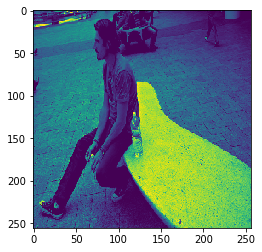

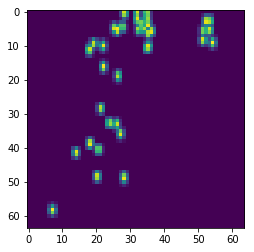

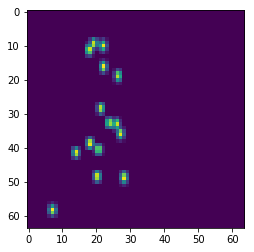

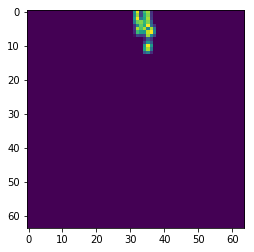

In [266]:
import matplotlib.pyplot as plt

idx = 518
image, heatmap, heatmap_pos, heatmap_neg = dataset[idx]

plt.imshow(image[0].cpu())
plt.show()
plt.imshow(heatmap.max(0)[0].cpu())
plt.show()
plt.imshow(heatmap_pos.max(0)[0].cpu())
plt.show()
plt.imshow(heatmap_neg.max(0)[0].cpu())
plt.show()